## Context Wise MM results

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from collections import defaultdict

from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

In [2]:
path_to_preds = Path("../../Preds/MotionSound/")

In [3]:
# context and activities
contexts = {
    'Bathroom': ['Brushing_hair', 'Hair_dryer_in_use', 'Shaver_in_use', 'Toilet_flushing', 'Toothbrushing', 'Washing_hands'],
    'Kitchen': ['Blender_in_use', 'Chopping', 'Grating', 'Microwave', 'Pouring_pitcher', 'Twisting_jar', 'Washing_Utensils', 'Wiping_with_rag'],
    'Misc': ['Alarm_clock', 'Clapping', 'Coughing', 'Drinking', 'Knocking', 'Laughing', 'Scratching'],
    'Workshop': ['Drill in use', 'Hammering', 'Sanding', 'Screwing', 'Vacuum in use']
}

In [4]:
sub_sr_metrics = []
for sub_sr_path in path_to_preds.iterdir():
    if sub_sr_path.is_file():
        continue
    sub_sr = sub_sr_path.name
    
    bas = defaultdict(list)
    for fpath in (sub_sr_path).iterdir():
        pred_df = pd.read_csv(fpath)
        pred_df[["PID", "Context", "Activity", "TrialNo"]] = pred_df["file_name"].str.split("---").to_list()
        
        preds = defaultdict(list)
        for name, group in pred_df.groupby(["file_name"]):
            probs = group.drop(columns=["file_name", "y_pred", "y_true", "PID", "Context", "Activity", "TrialNo"])

            group_context = group["Context"].unique()[0]
            group_activity = group["y_true"].unique()[0]
            if group_context == "Other":
                continue
            if group_context == "All":
                continue

            filtered_probs = probs[contexts[group_context]]
            summed_probs = filtered_probs.sum(axis=0)
            y_pred = summed_probs.idxmax()

            preds[group_context].append([group_activity, y_pred])
            
        for context in preds.keys():
            preds_arr = np.array(preds[context])
            bas[context].append(balanced_accuracy_score(preds_arr[:, 0], preds_arr[:, 1]))
    
    for context in bas.keys():
        context_mean = np.mean(bas[context])
        context_std = np.std(bas[context])
        
        sub_sr_metrics.append([sub_sr, context_mean, context_std, context])

In [5]:
results = pd.DataFrame(sub_sr_metrics, columns=["sub_sr", "mean", "std", "context"])
results["sub_sr"] = results["sub_sr"].astype(int)

,mean,std
sub_sr,,
16000,0.969444,0.06911
1000,0.952778,0.07713


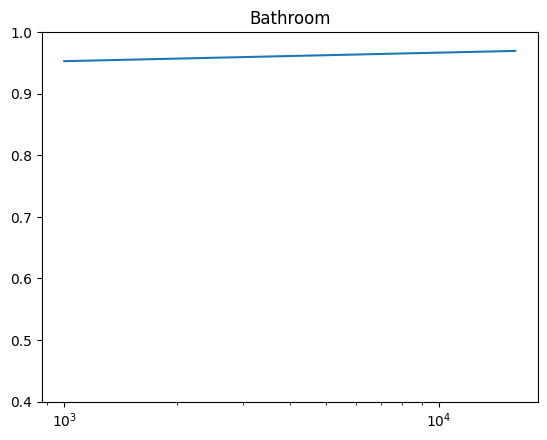

,mean,std
sub_sr,,
16000,0.937946,0.051971
1000,0.915327,0.066513


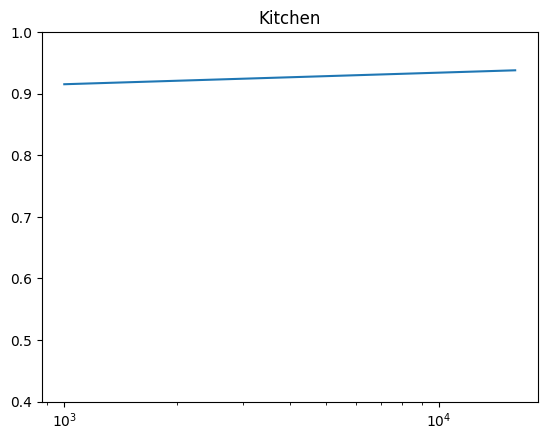

,mean,std
sub_sr,,
16000,0.947368,0.053284
1000,0.889724,0.102543


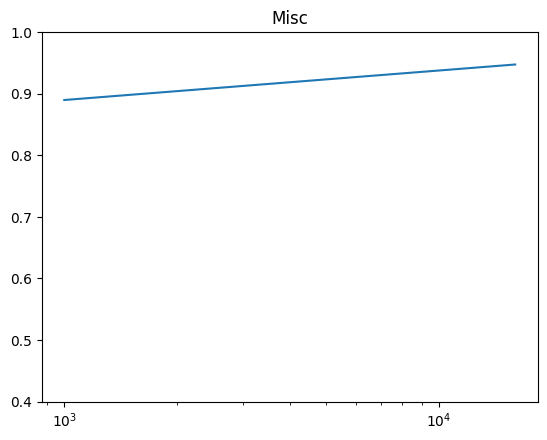

,mean,std
sub_sr,,
16000,0.985965,0.034735
1000,0.964912,0.058713


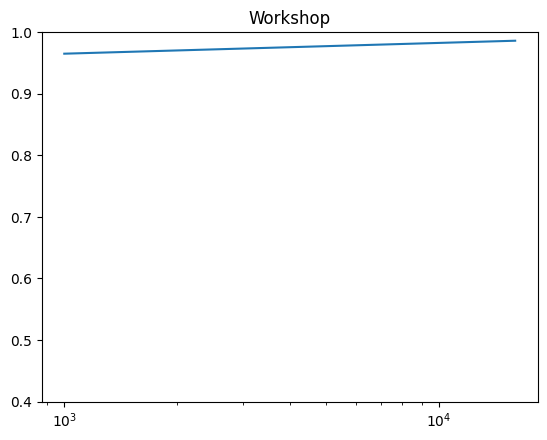

In [6]:
for name, group in results.groupby(["context"]):
    data = group.sort_values(by=["sub_sr"], ascending=False)
    display(data.drop(columns=["context"]).set_index("sub_sr"))
    
    plt.plot(data["sub_sr"], data["mean"])
    plt.ylim([0.4, 1.0])
    plt.xscale("log")
    plt.title(name)
    plt.show()

In [7]:
# averaged accross contexts
results.groupby("sub_sr").mean().sort_index(ascending=False)

,mean,std
sub_sr,,
16000,0.960181,0.052275
1000,0.930685,0.076225


# Context Wise Sound Results

In [8]:
path_to_preds = Path("../../Preds/Sound/")
sub_sr_metrics = []
for sub_sr_path in path_to_preds.iterdir():
    if sub_sr_path.is_file():
        continue
    sub_sr = sub_sr_path.name
    
    bas = defaultdict(list)
    for fpath in (sub_sr_path).iterdir():
        pred_df = pd.read_csv(fpath)
        pred_df[["PID", "Context", "Activity", "TrialNo"]] = pred_df["file_name"].str.split("---").to_list()
        
        preds = defaultdict(list)
        for name, group in pred_df.groupby(["file_name"]):
            probs = group.drop(columns=["file_name", "y_pred", "y_true", "PID", "Context", "Activity", "TrialNo"])

            group_context = group["Context"].unique()[0]
            group_activity = group["y_true"].unique()[0]
            if group_context == "Other":
                continue
            if group_context == "All":
                continue

            filtered_probs = probs[contexts[group_context]]
            summed_probs = filtered_probs.sum(axis=0)
            y_pred = summed_probs.idxmax()

            preds[group_context].append([group_activity, y_pred])
            
        for context in preds.keys():
            preds_arr = np.array(preds[context])
            bas[context].append(balanced_accuracy_score(preds_arr[:, 0], preds_arr[:, 1]))
    
    for context in bas.keys():
        context_mean = np.mean(bas[context])
        context_std = np.std(bas[context])
        
        sub_sr_metrics.append([sub_sr, context_mean, context_std, context])
        
results = pd.DataFrame(sub_sr_metrics, columns=["sub_sr", "mean", "std", "context"])
results["sub_sr"] = results["sub_sr"].astype(int)

,mean,std
sub_sr,,
16000,0.916667,0.101683
1000,0.816667,0.123103


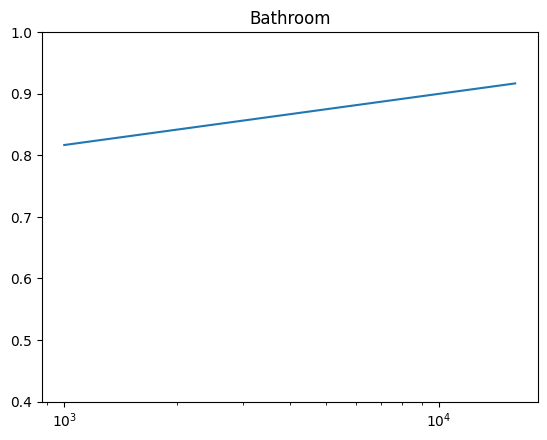

,mean,std
sub_sr,,
16000,0.796875,0.099013
1000,0.711458,0.102545


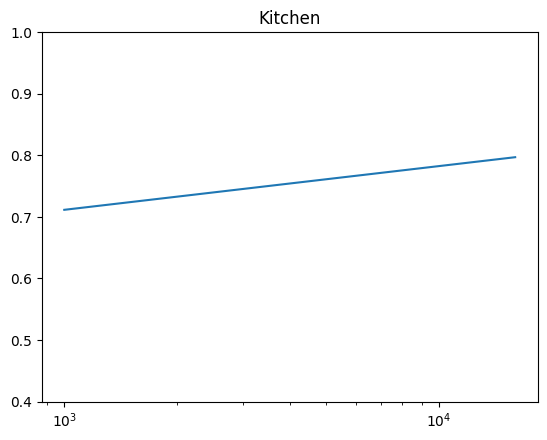

,mean,std
sub_sr,,
16000,0.869674,0.082972
1000,0.751880,0.121237


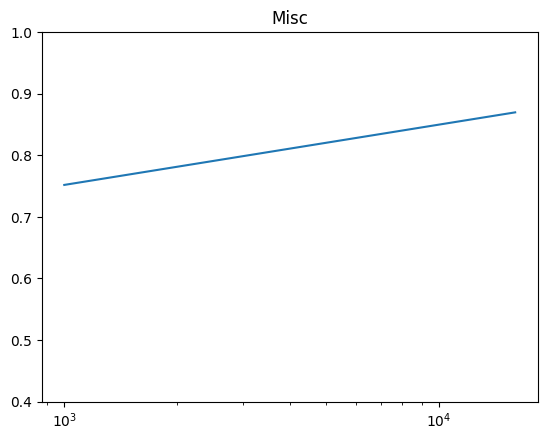

,mean,std
sub_sr,,
16000,0.936842,0.062963
1000,0.905263,0.090005


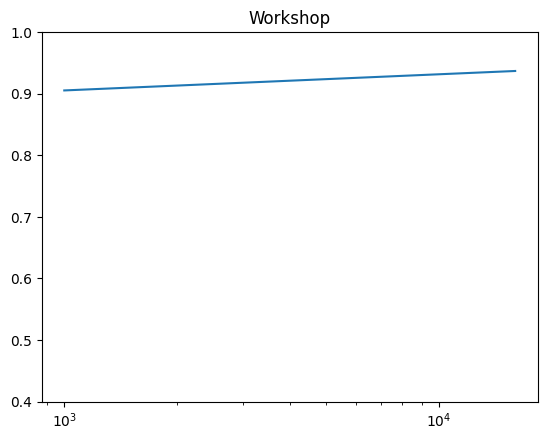

In [9]:
for name, group in results.groupby(["context"]):
    data = group.sort_values(by=["sub_sr"], ascending=False)
    display(data.drop(columns=["context"]).set_index("sub_sr"))
    
    plt.plot(data["sub_sr"], data["mean"])
    plt.ylim([0.4, 1.0])
    plt.xscale("log")
    plt.title(name)
    plt.show()

In [10]:
results.groupby("sub_sr").mean().sort_index(ascending=False)

,mean,std
sub_sr,,
16000,0.880014,0.086658
1000,0.796317,0.109222


In [11]:
path_to_preds = Path("../../Preds/Motion/")

bas = defaultdict(list)
for fpath in (path_to_preds).iterdir():
    pred_df = pd.read_csv(fpath)
    pred_df[["PID", "Context", "Activity", "TrialNo"]] = pred_df["file_name"].str.split("---").to_list()

    preds = defaultdict(list)
    for name, group in pred_df.groupby(["file_name"]):
        probs = group.drop(columns=["file_name", "y_pred", "y_true", "PID", "Context", "Activity", "TrialNo"])

        group_context = group["Context"].unique()[0]
        group_activity = group["y_true"].unique()[0]
        if group_context == "Other":
            continue
        if group_context == "All":
            continue

        filtered_probs = probs[contexts[group_context]]
        summed_probs = filtered_probs.sum(axis=0)
        y_pred = summed_probs.idxmax()

        preds[group_context].append([group_activity, y_pred])

    for context in preds.keys():
        preds_arr = np.array(preds[context])
        bas[context].append(balanced_accuracy_score(preds_arr[:, 0], preds_arr[:, 1]))

results = []
for context in bas.keys():
    context_mean = np.mean(bas[context])
    context_std = np.std(bas[context])

    results.append([context, context_mean, context_std])
    # sub_sr_metrics.append([sub_sr, context_mean, context_std, context])
results = pd.DataFrame(results, columns=["context", "mean", "std"])

In [12]:
results

,context,mean,std
0,Bathroom,0.888889,0.130289
1,Kitchen,0.789583,0.133382
2,Misc,0.659148,0.146782
3,Workshop,0.849123,0.151163
